ARM-R


In [5]:
install.packages("arules")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
install.packages("arulesViz", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘TSP’, ‘ggforce’, ‘graphlayouts’, ‘crosstalk’, ‘seriation’, ‘vcd’, ‘igraph’, ‘ggraph’, ‘DT’, ‘plotly’, ‘tidygraph’, ‘shinythemes’




In [2]:
install.packages("TSP")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("dplyr", dependencies = TRUE)
install.packages("purrr", dependencies = TRUE)
install.packages("devtools", dependencies = TRUE)
install.packages("tidyr")
library(viridis)
library(arules)
library(TSP)
library(data.table)
#library(ggplot2)
#library(Matrix)
library(tcltk)
library(dplyr)
library(devtools)
library(purrr)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘profmem’, ‘rex’, ‘plogr’, ‘bench’, ‘covr’, ‘Lahman’, ‘lobstr’, ‘microbenchmark’, ‘nycflights13’, ‘RMySQL’, ‘RPostgreSQL’, ‘RSQLite’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xmlparsedata’, ‘whoami’, ‘hunspell’, ‘BiocManager’, ‘foghorn’, ‘gmailr’, ‘lintr’, ‘mockery’, ‘pingr’, ‘rhub’, ‘spelling’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: viridisLite

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message:
“no DISPLAY variable so Tk is not available”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    bet

In [4]:
# Load necessary libraries
library(arules)
library(arulesViz)
library(RColorBrewer)

# Read transactions from CSV file
FashionData <- read.transactions("fashion_sustainability_cleaned_final.csv",
                               rm.duplicates = FALSE,
                               format = "basket",  ## If using "single" also use cols=c(1,2)
                               sep=",",  ## CSV file
                               cols=1) ## The dataset HAS row numbers

# Inspect transactions
inspect(FashionData)

Warning message in asMethod(object):
“removing duplicated items in transactions”


       items                         transactionID
[1]    {Average_Price_USD,                        
        Carbon_Footprint_MT,                      
        Certifications,                           
        Country,                                  
        Eco_Friendly_Manufacturing,               
        Market_Trend,                             
        Material_Type,                            
        Product_Lines,                            
        Recycling_Programs,                       
        Sustainability_Rating,                    
        Waste_Production_KG,                      
        Water_Usage_Liters,                       
        Year}                           Brand_Name
[2]    {1308839.48,                               
        2015,                                     
        328.81,                                   
        5,                                        
        60047.04,                                 
        85.13,                 

In [5]:
##### Use apriori to get the RULES
FrulesK = arules::apriori(FashionData, parameter = list(support=.15,
                                                 confidence=.25, minlen=2))
inspect(FrulesK)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5    0.15      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 752 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[19128 item(s), 5014 transaction(s)] done [0.04s].
sorting and recoding items ... [19 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [46 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                 rhs         support   confidence coverage  lift     
[1]  {Fair Trade}     => {No}        0.1685281 0.7497782  0.2247706 1.0057217
[2]  {Fair Trade}     => {Yes}       0.1677304 0.7462289  0.2247706 0.9882704
[3]  {B Corp}         => {No}        0.1796968 0.754

In [ ]:
# prompt: can we save this in a csv

write.csv(as.data.frame(inspect(FrulesK)), file = "apriori_rules.csv", row.names = FALSE)


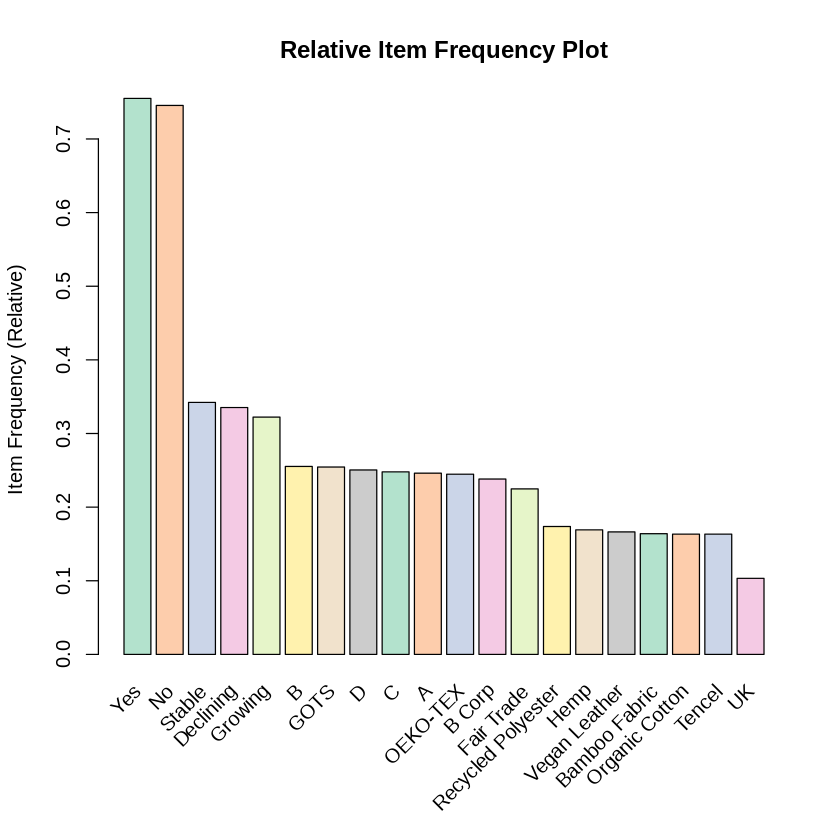

In [6]:
# Plot of which items are most frequent
arules::itemFrequencyPlot(FashionData, topN = 20,
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative", #absolute
                          ylab = "Item Frequency (Relative)")

## Sort rules by different metrics
SortedRules_Support <- sort(FrulesK, by="support", decreasing=TRUE)
SortedRules_Confidence <- sort(FrulesK, by="confidence", decreasing=TRUE)
SortedRules_Lift <- sort(FrulesK, by="lift", decreasing=TRUE)


In [10]:
# Inspect top 15 rules by support, confidence, and lift
inspect(SortedRules_Support[1:15])

     lhs            rhs         support   confidence coverage  lift      count
[1]  {No}        => {Yes}       0.5007978 0.6717496  0.7455126 0.8896335 2511 
[2]  {Yes}       => {No}        0.5007978 0.6632330  0.7550858 0.8896335 2511 
[3]  {Stable}    => {No}        0.2612684 0.7634033  0.3422417 1.0239978 1310 
[4]  {No}        => {Stable}    0.2612684 0.3504548  0.7455126 1.0239978 1310 
[5]  {Stable}    => {Yes}       0.2598724 0.7593240  0.3422417 1.0056129 1303 
[6]  {Yes}       => {Stable}    0.2598724 0.3441627  0.7550858 1.0056129 1303 
[7]  {Declining} => {Yes}       0.2558835 0.7632362  0.3352613 1.0107940 1283 
[8]  {Yes}       => {Declining} 0.2558835 0.3388801  0.7550858 1.0107940 1283 
[9]  {Declining} => {No}        0.2439170 0.7275431  0.3352613 0.9758965 1223 
[10] {No}        => {Declining} 0.2439170 0.3271803  0.7455126 0.9758965 1223 
[11] {Growing}   => {No}        0.2403271 0.7456683  0.3222976 1.0002089 1205 
[12] {No}        => {Growing}   0.2403271 0.3223649 

In [11]:
inspect(SortedRules_Confidence[1:15])

     lhs             rhs   support   confidence coverage  lift      count
[1]  {A}          => {No}  0.1900678 0.7722853  0.2461109 1.0359118  953 
[2]  {B}          => {Yes} 0.1966494 0.7703125  0.2552852 1.0201656  986 
[3]  {C}          => {Yes} 0.1906661 0.7691070  0.2479059 1.0185691  956 
[4]  {OEKO-TEX}   => {Yes} 0.1874751 0.7660962  0.2447148 1.0145817  940 
[5]  {Stable}     => {No}  0.2612684 0.7634033  0.3422417 1.0239978 1310 
[6]  {Declining}  => {Yes} 0.2558835 0.7632362  0.3352613 1.0107940 1283 
[7]  {B Corp}     => {Yes} 0.1816913 0.7629816  0.2381332 1.0104568  911 
[8]  {Stable}     => {Yes} 0.2598724 0.7593240  0.3422417 1.0056129 1303 
[9]  {D}          => {Yes} 0.1890706 0.7547771  0.2504986 0.9995912  948 
[10] {B Corp}     => {No}  0.1796968 0.7546064  0.2381332 1.0121981  901 
[11] {GOTS}       => {Yes} 0.1908656 0.7500000  0.2544874 0.9932647  957 
[12] {Fair Trade} => {No}  0.1685281 0.7497782  0.2247706 1.0057217  845 
[13] {Fair Trade} => {Yes} 0.1677304 0

In [12]:
inspect(SortedRules_Lift[1:15])

     lhs             rhs         support   confidence coverage  lift     count
[1]  {No, Yes}    => {Stable}    0.1788991 0.3572282  0.5007978 1.043789  897 
[2]  {A}          => {No}        0.1900678 0.7722853  0.2461109 1.035912  953 
[3]  {No}         => {A}         0.1900678 0.2549492  0.7455126 1.035912  953 
[4]  {Stable}     => {No}        0.2612684 0.7634033  0.3422417 1.023998 1310 
[5]  {No}         => {Stable}    0.2612684 0.3504548  0.7455126 1.023998 1310 
[6]  {B}          => {Yes}       0.1966494 0.7703125  0.2552852 1.020166  986 
[7]  {Yes}        => {B}         0.1966494 0.2604332  0.7550858 1.020166  986 
[8]  {C}          => {Yes}       0.1906661 0.7691070  0.2479059 1.018569  956 
[9]  {Yes}        => {C}         0.1906661 0.2525092  0.7550858 1.018569  956 
[10] {OEKO-TEX}   => {Yes}       0.1874751 0.7660962  0.2447148 1.014582  940 
[11] {B Corp}     => {No}        0.1796968 0.7546064  0.2381332 1.012198  901 
[12] {Declining}  => {Yes}       0.2558835 0.7632362

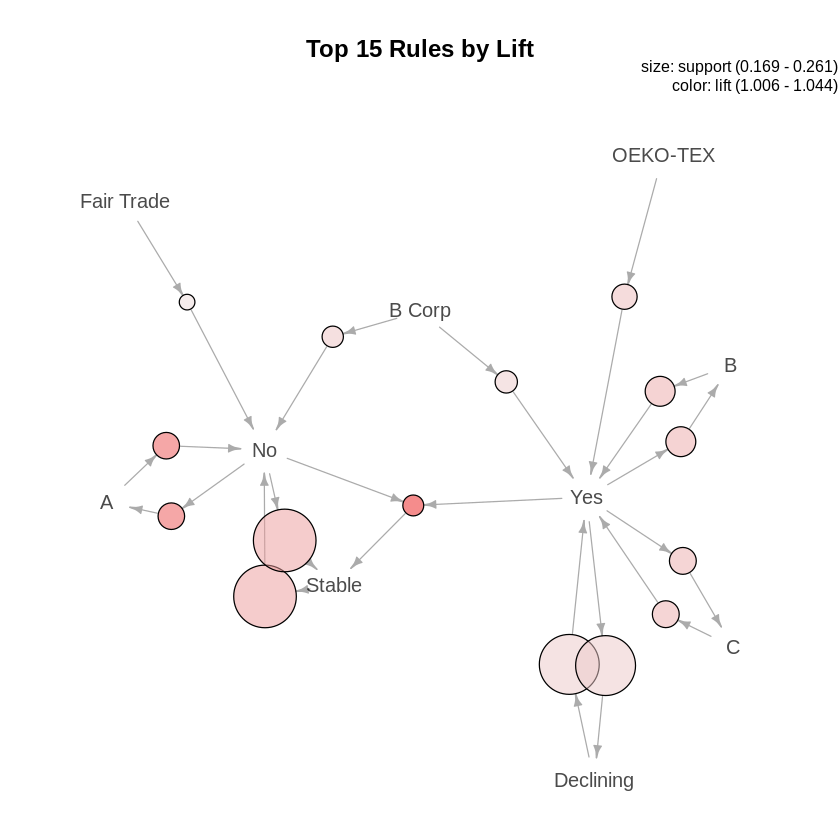

In [17]:
# Plot using a graph-based method
plot(top_rules, method="graph", engine="igraph", main="Top 15 Rules by Lift")


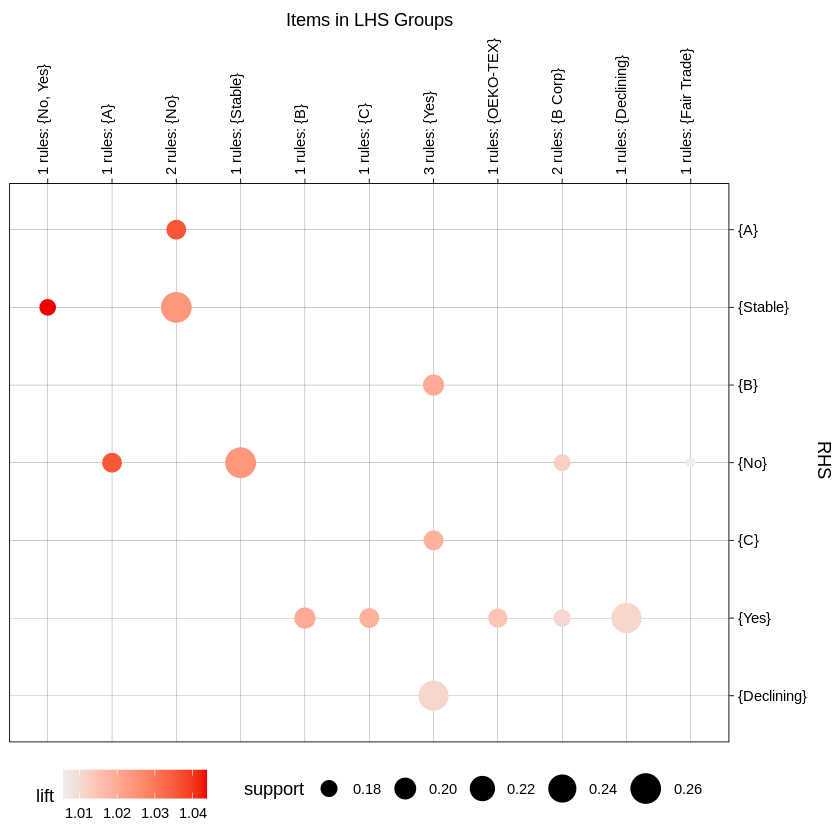

In [18]:
plot(top_rules, method="grouped")
